# Deep Learning Lab 4

* Import CIFAR10 dataset
* Train basic model
* Tune model manually
* Tune model using keras tuner

In [1]:
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Checking GPU

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
tf.test.gpu_device_name()
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Import, split and normalise CIFAR10 dataset

In [4]:
(x_t, y_t), (x_test, y_test) = datasets.cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_t, y_t)

# Normalizing pixel values
x_train, x_val, x_test = x_train / 255.0, x_val / 255.0, x_test / 255.0

## Train basic model

In [5]:
model =models.Sequential()
model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(10))

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

In [7]:
model.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15)

Epoch 1/15
1172/1172 [==============================] - 7s 5ms/step - loss: 1.6163 - accuracy: 0.4250 - val_loss: 1.3204 - val_accuracy: 0.5321
Epoch 2/15
1172/1172 [==============================] - 5s 4ms/step - loss: 1.1281 - accuracy: 0.6063 - val_loss: 1.1202 - val_accuracy: 0.6080
Epoch 3/15
1172/1172 [==============================] - 5s 4ms/step - loss: 0.9266 - accuracy: 0.6771 - val_loss: 1.1333 - val_accuracy: 0.6122
Epoch 4/15
1172/1172 [==============================] - 5s 4ms/step - loss: 0.7795 - accuracy: 0.7283 - val_loss: 1.1452 - val_accuracy: 0.6162
Epoch 5/15
1172/1172 [==============================] - 5s 4ms/step - loss: 0.6339 - accuracy: 0.7788 - val_loss: 1.2489 - val_accuracy: 0.6079
Epoch 6/15
1172/1172 [==============================] - 5s 4ms/step - loss: 0.4981 - accuracy: 0.8273 - val_loss: 1.3196 - val_accuracy: 0.6128
Epoch 7/15
1172/1172 [==============================] - 5s 4ms/step - loss: 0.3777 - accuracy: 0.8714 - val_loss: 1.4762 - val_accuracy:

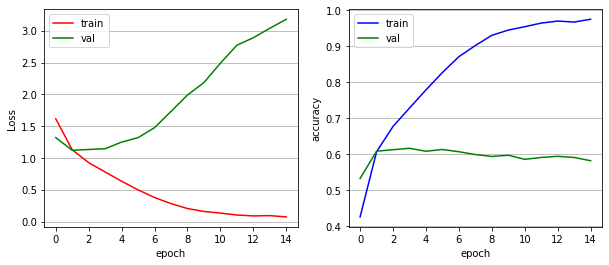

In [9]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_no_dropout")

Looking at the graph we can clearly see that there is a huge amount of overfitting  between train and validation. We must add Pooling and dropouts to reduce the overfitting issue.

## Tune model manually

In [10]:
model2 =models.Sequential()
model2.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3), padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(2,2))
model2.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"))
model2.add(tf.keras.layers.MaxPooling2D(4,4))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(64, activation="relu"))
model2.add(tf.keras.layers.Dense(10))

optimizer_fn = tf.keras.optimizers.Adam(learning_rate=0.001)

model2.compile(optimizer=optimizer_fn,
              loss=loss_fn,
              metrics=['accuracy'])

In [11]:
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val),epochs=15)

Epoch 1/15
1172/1172 [==============================] - 5s 4ms/step - loss: 1.6419 - accuracy: 0.4038 - val_loss: 1.3802 - val_accuracy: 0.5037
Epoch 2/15
1172/1172 [==============================] - 4s 4ms/step - loss: 1.3199 - accuracy: 0.5272 - val_loss: 1.2056 - val_accuracy: 0.5683
Epoch 3/15
1172/1172 [==============================] - 4s 4ms/step - loss: 1.1979 - accuracy: 0.5766 - val_loss: 1.1583 - val_accuracy: 0.5917
Epoch 4/15
1172/1172 [==============================] - 4s 4ms/step - loss: 1.1230 - accuracy: 0.6048 - val_loss: 1.0600 - val_accuracy: 0.6273
Epoch 5/15
1172/1172 [==============================] - 4s 4ms/step - loss: 1.0731 - accuracy: 0.6194 - val_loss: 1.0216 - val_accuracy: 0.6381
Epoch 6/15
1172/1172 [==============================] - 4s 4ms/step - loss: 1.0362 - accuracy: 0.6349 - val_loss: 1.0339 - val_accuracy: 0.6400
Epoch 7/15
1172/1172 [==============================] - 4s 3ms/step - loss: 0.9928 - accuracy: 0.6514 - val_loss: 0.9546 - val_accuracy:

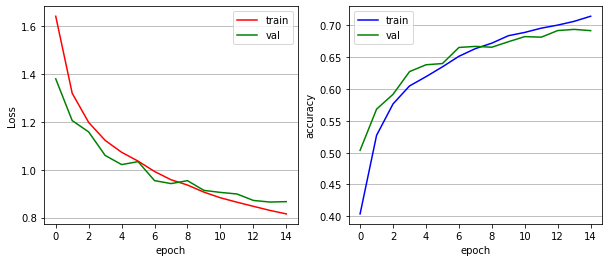

In [12]:
#plot 
figure= plt.figure(figsize=(10,4))
ax = plt.subplot(121)
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'g', label='val')

plt.legend()
plt.grid(axis='y')
plt.xlabel("epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("cifar10_training_val_with_dropout")

We have successfully reduced the overfitting and increased the model's vaildation accuracy considerably but we must still tune the parameters to make sure to have a even higher accuracy.

## Extensive Hyperparameter Tuning with Keras Tuner

In [13]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [14]:
def build_model(hp):
    model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('Conv_1_filter', min_value=8, max_value=32, step=8),
        kernel_size=hp.Choice('Conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('Conv_2_filter', min_value=16, max_value=64, step=16),
        kernel_size=hp.Choice('Conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(rate=(hp.Float('Dropout_rate_1', min_value=0.0, max_value=0.5, step=0.05))),
    keras.layers.Conv2D(
        filters=hp.Int('Conv_3_filter', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('Conv_3_kernel', values = [3,5]),
        activation='relu',
    ),
    keras.layers.Conv2D(
        filters=hp.Int('Conv_4_filter', min_value=32, max_value=128, step=32),
        kernel_size=hp.Choice('Conv_4_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(rate=(hp.Float('Dropout_rate_2', min_value=0.0, max_value=0.5, step=0.05))),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=keras.regularizers.L1L2(
            hp.Float('L1_Regularisation', min_value=0.0, max_value=0.5, step=0.1),
            hp.Float('L2_Regularisation', min_value=0.0, max_value=0.1, step=0.05)
        )
    ),
    keras.layers.Dropout(rate=(hp.Float('Dropout_rate_3', min_value=0.0, max_value=0.5, step=0.05))),
    keras.layers.Dense(10, activation='softmax')
  ])
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Float(
                    'Learning_rate',
                    min_value=1e-4,
                    max_value=1e-2,
                    sampling='LOG',
                    default=1e-3
                )
            ),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
    return model

In [15]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=75,
                          directory='output',
                          project_name="CIFAR10 Tuning with regularisation")

INFO:tensorflow:Reloading Oracle from existing project output\CIFAR10 Tuning with regularisation\oracle.json
INFO:tensorflow:Reloading Tuner from output\CIFAR10 Tuning with regularisation\tuner0.json


In [16]:
tuner_search.search(x_train, y_train, validation_data=(x_val, y_val),epochs=15)

Trial 25 Complete [00h 02m 03s]
val_accuracy: 0.10719999670982361

Best val_accuracy So Far: 0.7520800232887268
Total elapsed time: 00h 46m 34s
INFO:tensorflow:Oracle triggered exit


In [24]:
bestModel=tuner_search.get_best_models(num_models=1)[0]

In [25]:
bestModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 24)        672       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        19232     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 96)          55392     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0

In [26]:
bestModel.evaluate(x_train, y_train)

1172/1172 [==============================] - 3s 2ms/step - loss: 0.4614 - accuracy: 0.8464


[0.46136176586151123, 0.8464000225067139]

In [27]:
bestModel.evaluate(x_val, y_val)

391/391 [==============================] - 1s 2ms/step - loss: 0.4692 - accuracy: 0.8449


[0.46918851137161255, 0.8448799848556519]

In [29]:
bestModel.save('./regularised')

INFO:tensorflow:Assets written to: ./regularised\assets


## Testing best model

In [30]:
saved_bestModel = tf.keras.models.load_model('./regularised')

In [31]:
saved_bestModel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.7412 - accuracy: 0.7497


[0.7411890029907227, 0.7497000098228455]

When we check on the test data, we see that the model gives an accuracy of 75% which is still acceptable. We have thus tuned our model to 75% accuracy.